# Data description

Task is to predict happiness score on the basis of factors like GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption which contribute in evaluating the happiness in each country.

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

# Loading Dataset

In [2]:
df=pd.read_csv('world-happiness.csv')

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.shape

(158, 12)

we have 158 rows and 12 columns

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Here, we need to convert datatypes of Country and region into numeric.

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

In [7]:
df['Region'] = le.fit_transform(df['Region'])

In [8]:
df.dtypes

Country                            int32
Region                             int32
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

Now, all the variables are having int and float datatypes

In [9]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [10]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

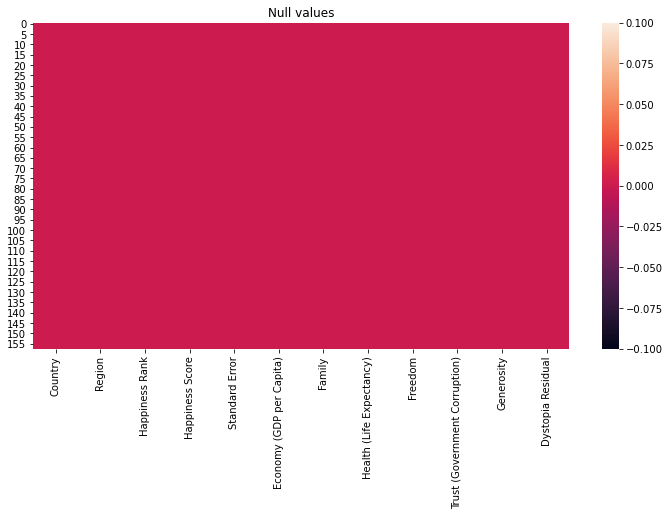

In [11]:
plt.figure(figsize=[12,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

There are no null values

In [12]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


There are chances of skewness and outliers in few columns. However, we will check them separately.

<AxesSubplot:>

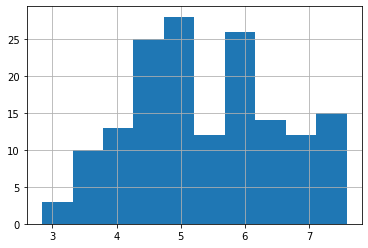

In [13]:
df['Happiness Score'].hist(grid=True)

Data seems to be balanced

# Checking the correlation

In [14]:
dfc=df.corr()

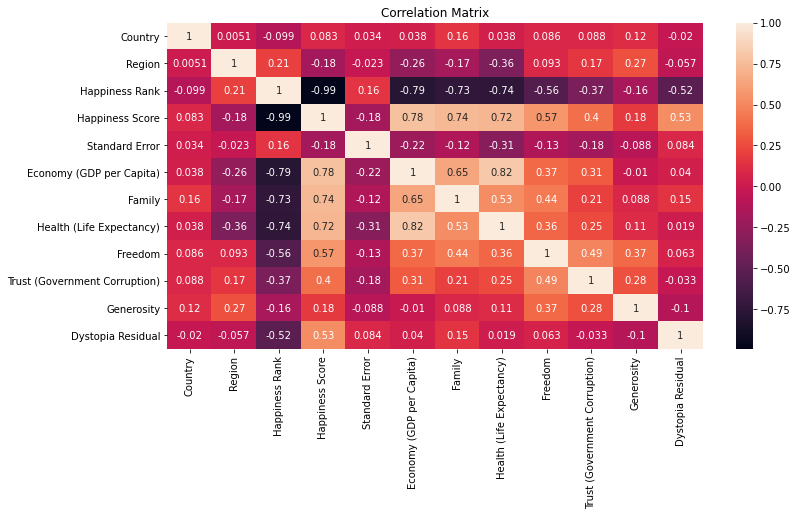

In [15]:
plt.figure(figsize=[12,6])
sns.heatmap(dfc,annot=True)
plt.title('Correlation Matrix')
plt.show()

Observations:
    1. Happiness rank is negatively correlated with Happiness score.
    2. Happiness score is highly correlated with Economy,Family, Health, and moderately correlated with Freedom, Dystopia              Residual,Trust
    3.Standard error is not correlated with any of the variables.
    4. Economy is highly correlated with Happiness score,health and Family and slightly correlated with Freedom and trust.
    5. Family is highly correlated with Happiness score,Economy and slightly correlated with Health, freedom and trust/
    6.Health is highly correlated to Happiness score, economy and family.
    7. Freedom is moderately correlated with Happiness score, family,Trust and slightly correlated with Ecomony, health and            Generosity.
    8. Trust is moderately correlated with happiness score, freedom and slightly correlated with Economy, Health and                  Generosity.
    9. Generosity is slightly correlated to freedom and trust.
    10. Dystopia residual is moderately correlated to Happiness score.
    11. Country and Region are not correlated to any of the variables.

<Figure size 720x432 with 0 Axes>

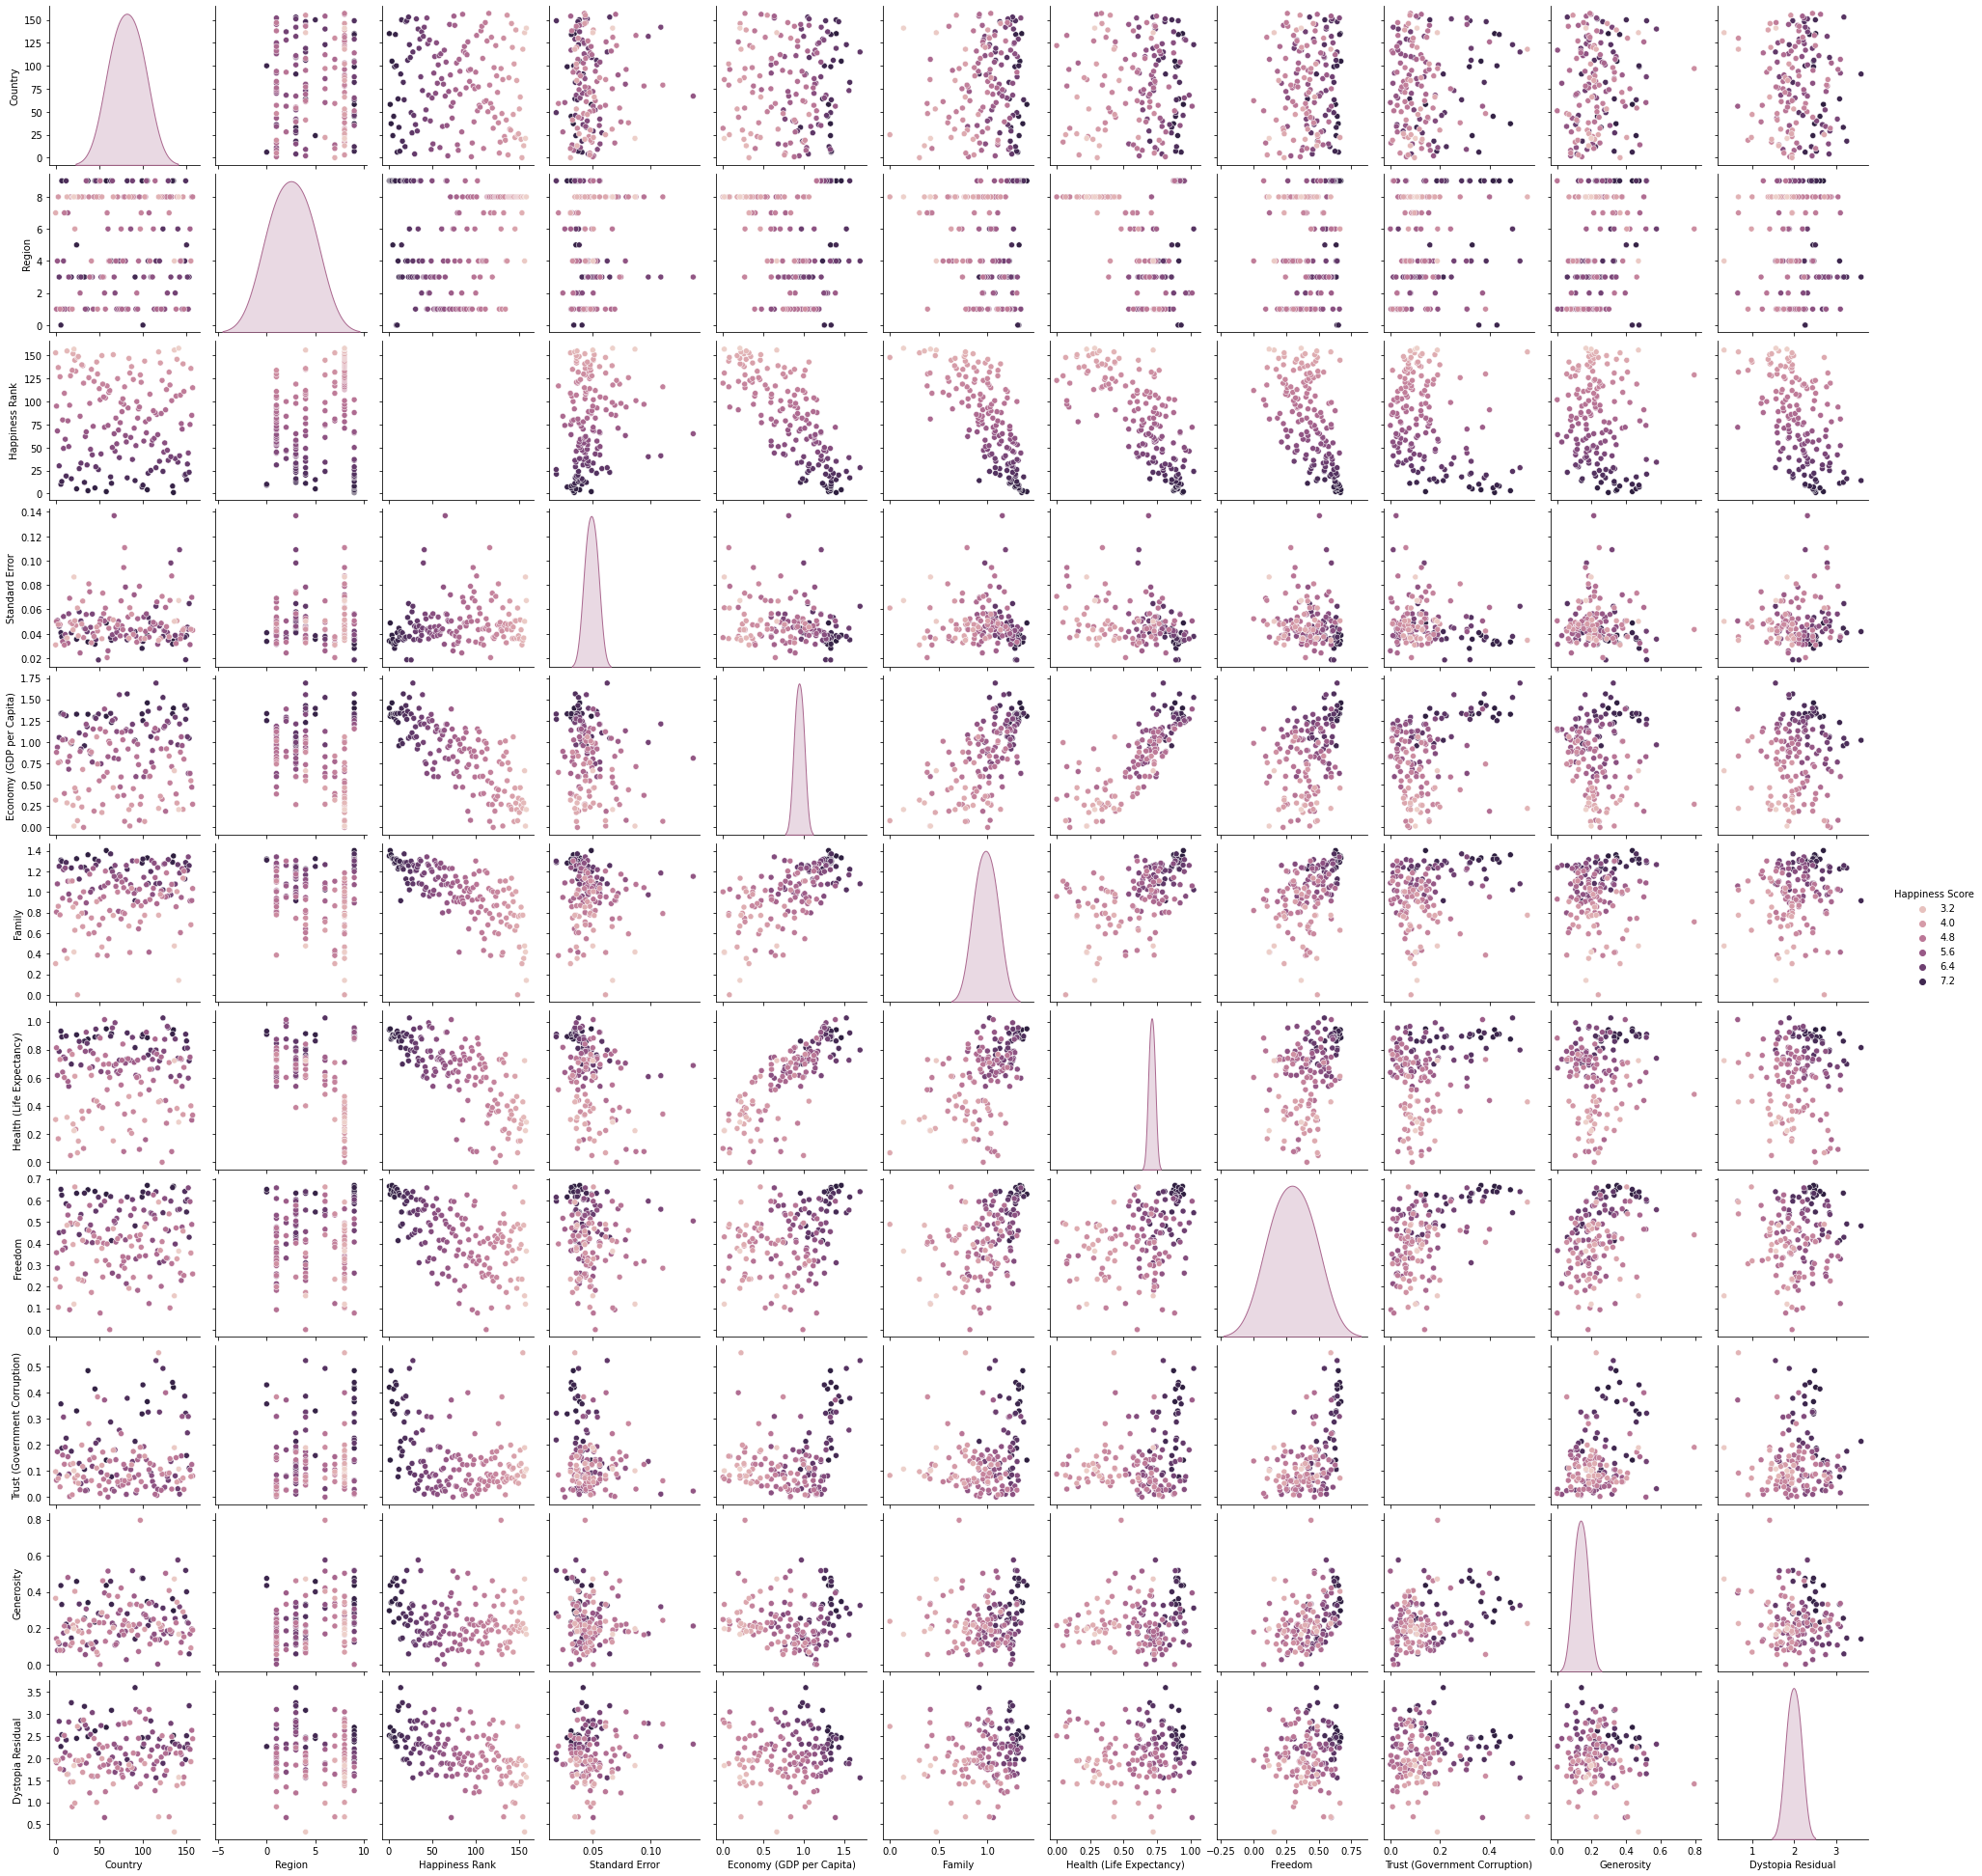

In [16]:
plt.figure(figsize=[10,6])
sns.pairplot(df,hue= 'Happiness Score')
plt.show()

# Checking the Data distribution

In [17]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

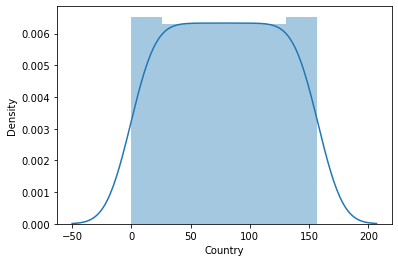

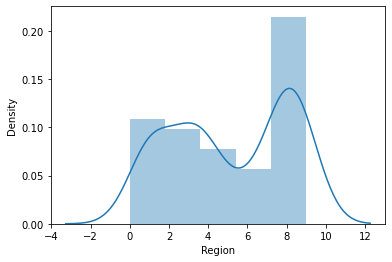

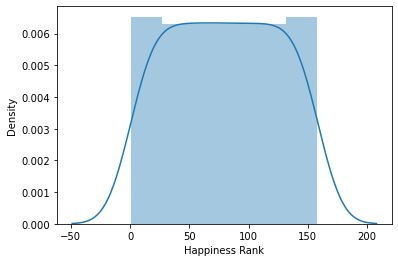

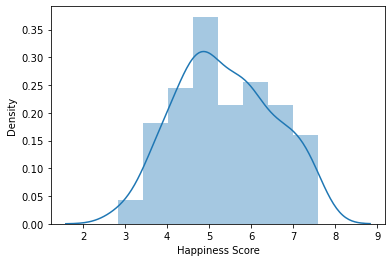

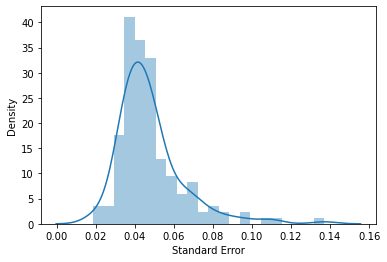

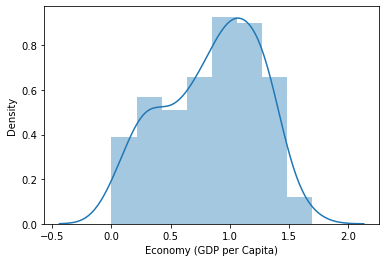

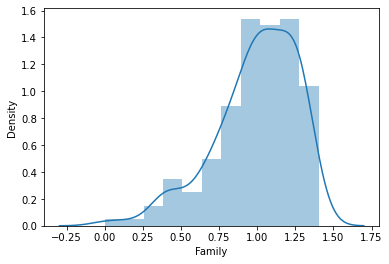

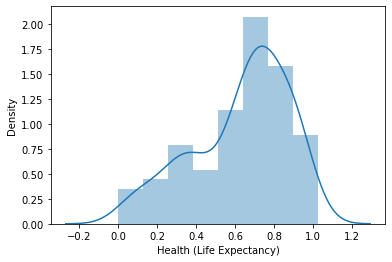

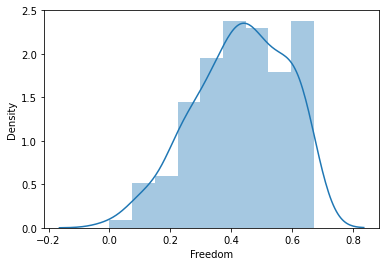

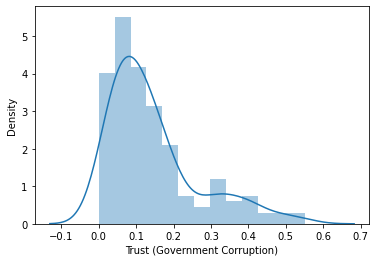

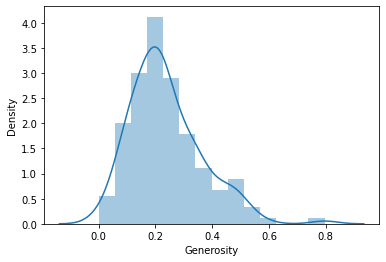

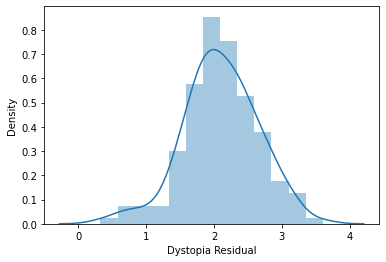

In [18]:
columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

for i in df[columns]:
    sns.distplot(df[i])
    plt.show()

In [19]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see skewness in few variables like Standard error, Family, Health, Trust, Generosity

# Checking the outliers

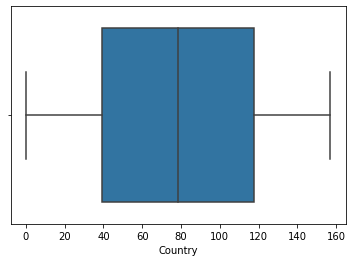

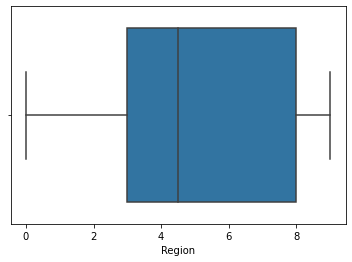

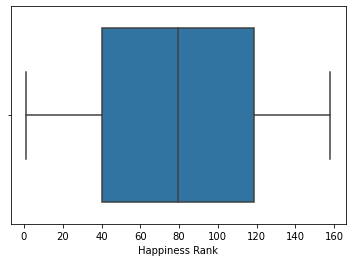

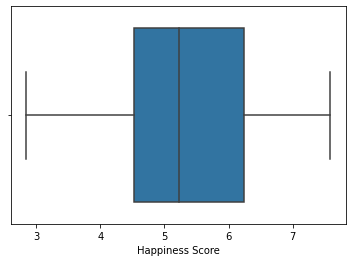

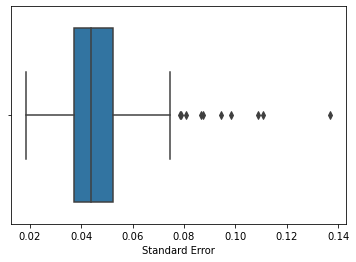

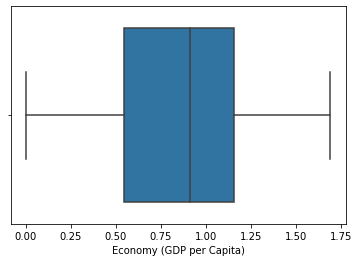

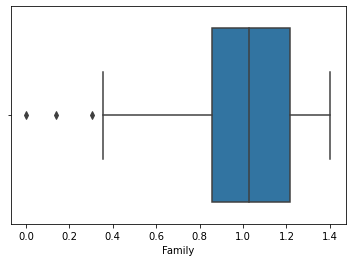

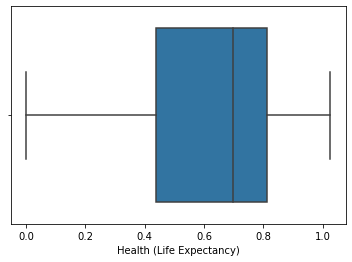

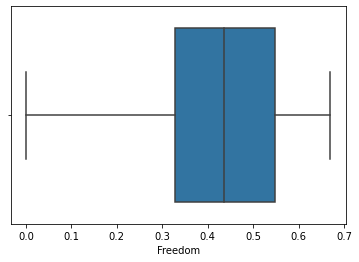

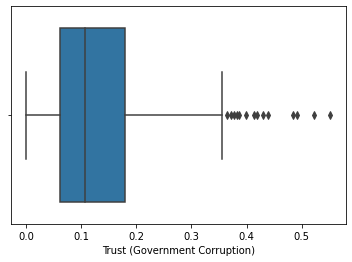

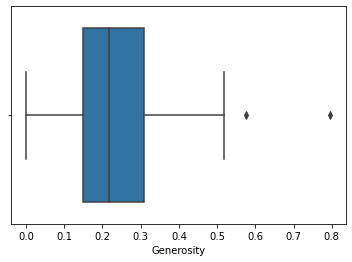

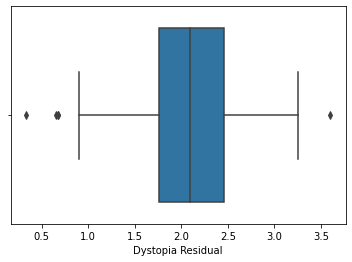

In [20]:
columns=['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']

for i in df[columns]:
    sns.boxplot(df[i])
    plt.show()

We can see few outliers in the some of the variables. Few outliers are near whiskers and few are away from the whiskers.

# Remove the outliers

In [21]:
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(df))

In [23]:
newdf=df[(z<3).all(axis=1)]

In [24]:
print('Shape before removing outliers:',df.shape)
print('Shape after removing outliers:',newdf.shape)

Shape before removing outliers: (158, 12)
Shape after removing outliers: (149, 12)


In [25]:
print((9/158)*100)

5.69620253164557


Loss of data is less than 7-8%, hence its acceptable

# Splitting the dataset

In [26]:
x=df.drop('Happiness Score',axis=1)

In [27]:
y=df['Happiness Score']

# Checking and removing the skewness

In [28]:
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [29]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)
df_new=pd.DataFrame(df_new, columns=x.columns)

In [30]:
df_new.skew()

Country                         -0.279791
Region                          -0.228041
Happiness Rank                  -0.264365
Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [31]:
x=df_new

# Finding the best Random state

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)    

Best accuracy is 0.9976787997308519 for random state 194


# Creating train_test_split

In [34]:
x_train.shape

(123, 11)

In [35]:
x_test.shape

(35, 11)

In [36]:
y_train.shape

(123,)

In [37]:
y_test.shape

(35,)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=194)
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [41]:
lm.score(x_train,y_train)

0.9920841253929782

In [42]:
lm.score(x_test,y_test)

0.9976787997308519

In [43]:
ypred=lm.predict(x_test)

In [46]:
r2_score(y_test,ypred)

0.9976787997308519

So, here model is giving 99% accuracy but this can be due to overfitting so we will apply regularization here

# Regularization

In [47]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV

In [50]:
lasscv=LassoCV(alphas = None, cv=10, max_iter = 1000, normalize = True) # Lassocv will return the best alpha value and coefficients after performing 10 cross validations

In [51]:
lasscv.fit(x_train,y_train) # training the model

LassoCV(cv=10, normalize=True)

In [53]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

9.730902308002807e-05

In [54]:
#Now when we have best alpha parameter, lets use lasso regression and see how well our data has fitted into the model
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=9.730902308002807e-05)

In [55]:
lasso_reg.score(x_test,y_test)

0.9977049972737558

In [56]:
#Using ridge regression model
#RidgeCV will return best alpha and coefficients after performing 10 cross validations.
#We will pass an array of random numbers for ridgeCV to select the best alpha from them

alphas=np.random.uniform(low=0,high=10,size=(50,))
ridgecv=RidgeCV(alphas=alphas,cv=10,normalize= True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([4.30836766, 5.19770751, 9.61968379, 3.78990368, 5.58204198,
       2.05474649, 2.14650965, 0.60338263, 1.08363511, 0.09611615,
       9.70601188, 2.68180098, 7.35639293, 8.71079732, 5.15751866,
       1.90039737, 1.07059773, 8.66905488, 9.8230602 , 1.82423239,
       3.53291652, 0.30642754, 8.09419846, 7.59433221, 3.91134294,
       4.45181995, 9.59145991, 6.34021943, 1.35268066, 0.2399038 ,
       8.94077396, 1.33128544, 1.67224781, 6.82132614, 2.30438959,
       7.26179257, 7.31996114, 4.33289958, 0.93554732, 1.93303073,
       0.27946203, 5.34903706, 8.75925946, 5.15604811, 9.50141531,
       4.1003628 , 8.82510615, 7.95401966, 0.42469499, 7.4764757 ]),
        cv=10, normalize=True)

In [57]:
ridgecv.alpha_

0.09611615381016403

In [58]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09611615381016403)

In [59]:
ridge_model.score(x_test,y_test)

0.9977267503984799

So , RidgeCV is better as compared to Lasso

# Saving the model

In [60]:
import joblib

In [62]:
joblib.dump(ridge_model,'worldhappiness.pkl')

['worldhappiness.pkl']

# Loading the Saved Model

In [63]:
model=joblib.load('worldhappiness.pkl')

# Checking if the model is working properly

In [64]:
prediction=model.predict(x_test)

In [65]:
print(r2_score(y_test,prediction)*100)

99.772675039848


In [66]:
prediction=pd.DataFrame(prediction)

In [67]:
prediction

,0
0,3.751940
1,6.972273
2,7.213932
3,6.103973
4,3.857627
5,7.365865
6,4.598951
7,5.067712
8,6.857192
9,4.832010


In [68]:
prediction.to_csv('Resultworldhappiness.csv')